In [234]:
import irondb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df_original = irondb.sql_get('cookies','cookies_quality')

In [236]:
#df_original.to_csv('cookies.csv')

In [237]:
df_original.isnull().sum() #We can set id as index

id                       0
sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   0
crunch factor            0
aesthetic appeal         0
dtype: int64

In [238]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 17 columns):
id                      5198 non-null int64
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5198 non-null object
crunch factor           5198 non-null object
aesthetic appeal        5198 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 690.4+ KB


# Some checks we did before data cleaning

In [239]:
df_original.groupby('aesthetic appeal')['quality'].mean()

aesthetic appeal
3    7.325120
4    7.333333
Name: quality, dtype: float64

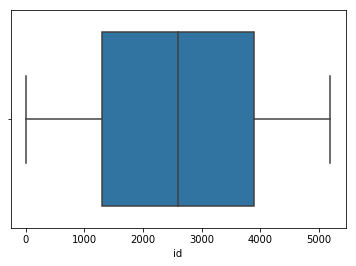

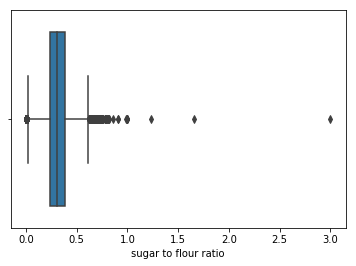

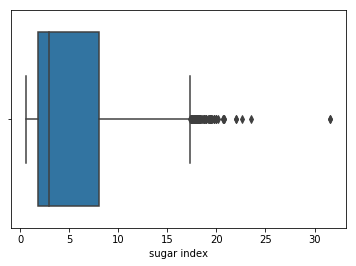

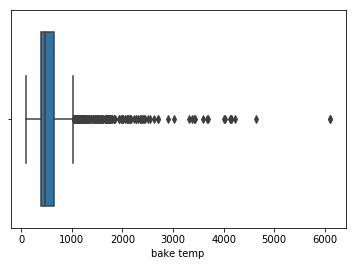

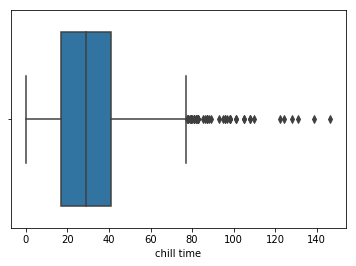

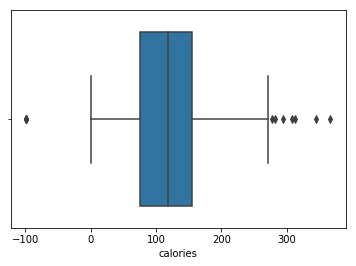

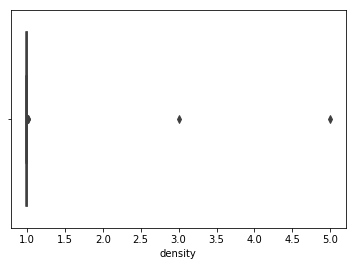

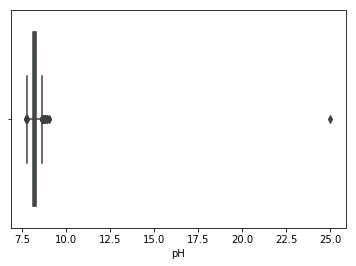

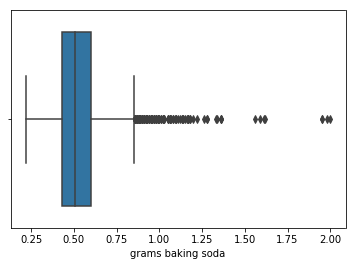

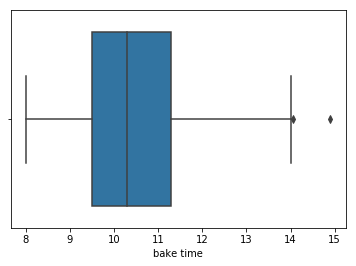

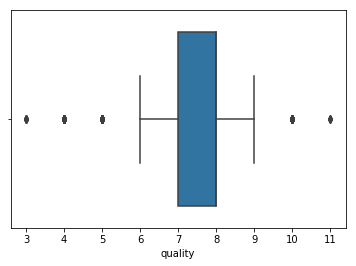

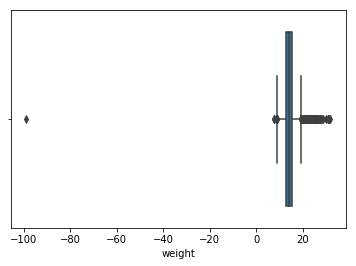

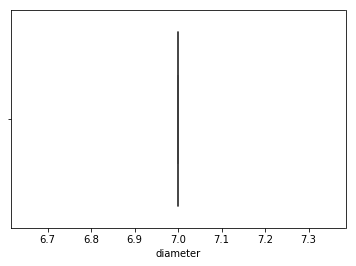

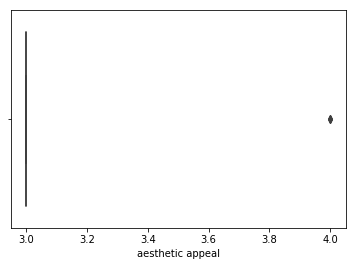

In [240]:
for i in list(df_original.select_dtypes(exclude=['object']).columns):
    sns.boxplot(df_original[i])
    plt.show()

In [241]:
df_original['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

In [242]:
df_original['aesthetic appeal'].value_counts() #This columns is not giving us so much information, so we are going to delete it

3    5195
4       3
Name: aesthetic appeal, dtype: int64

In [243]:
df_original['mixins'].value_counts()

chocolate                         1893
raisins                           1200
chocolate, oats                    749
nuts, chocolate                    521
nuts,raisins                       333
nuts, oats, chocolate              295
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
                                     2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [244]:
df_1 = df_original.copy()

# Data cleaning

In [245]:
def create_categories(df):
    flavours= ['raisins', 'nuts', 'chocolate', 'oats', 'peanut butter']
    for flavour in flavours:
        df[flavour] = 0
    for flavour in flavours:
        df[flavour] = np.where(df['mixins'].str.contains(flavour), 1, 0)

In [246]:
def clean_cookies(df):
    """
    We created this function to clean the data and have a better code.
    arg: Pandas Dataframe
    """
    df.set_index('id', inplace = True)
    df.dropna(inplace = True)
    df['crunch factor'] = pd.to_numeric(df['crunch factor'], errors = "coerce")
    create_categories(df)
    df.drop(columns = ['mixins', 'diameter', 'aesthetic appeal'], inplace = True)
    df.drop(index=df[df['sugar to flour ratio'] > 1.0].index, inplace=True)
    df.drop(index=df[df['calories'] < 1].index, inplace=True)
    df.drop(index=df[df['density'] > 1.5].index, inplace=True)
    df.drop(index=df[df['pH'] > 12].index, inplace=True)
    df.drop(index=df[df['quality'] > 10].index, inplace=True)
    df['bake temp'] = df['bake temp'].apply(lambda x: 640 if x > 640 else x)
    df.drop(index=df[df['weight'] < 1].index, inplace=True)
    df = pd.get_dummies(df, drop_first = True)
    df['baking_index'] = df['bake temp'] * df['bake time']
    df = df.reset_index(drop = True)  
    return df

In [247]:
df_clean = clean_cookies(df_1)

In [248]:
df_clean.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,raisins,nuts,chocolate,oats,peanut butter,butter type_melted,baking_index
count,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000
mean,0.317127,5.400561,479.624395,30.360891,115.187706,0.994667,8.218813,0.531169,10.494367,7.320232,14.407648,1.499185,0.299710,0.241433,0.675508,0.226912,0.013553,0.753533,4972.244076
std,0.143581,4.670116,126.214373,17.260294,56.090207,0.002933,0.161660,0.151081,1.193130,1.298746,2.586865,0.289238,0.458175,0.427993,0.468230,0.418876,0.115636,0.430995,1249.111015
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1215.000000
25%,0.240000,1.800000,380.000000,17.000000,77.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4033.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4800.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5975.000000
max,1.000000,31.600000,640.000000,146.500000,366.500000,1.010300,9.010000,2.000000,14.900000,10.000000,31.800000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9536.000000


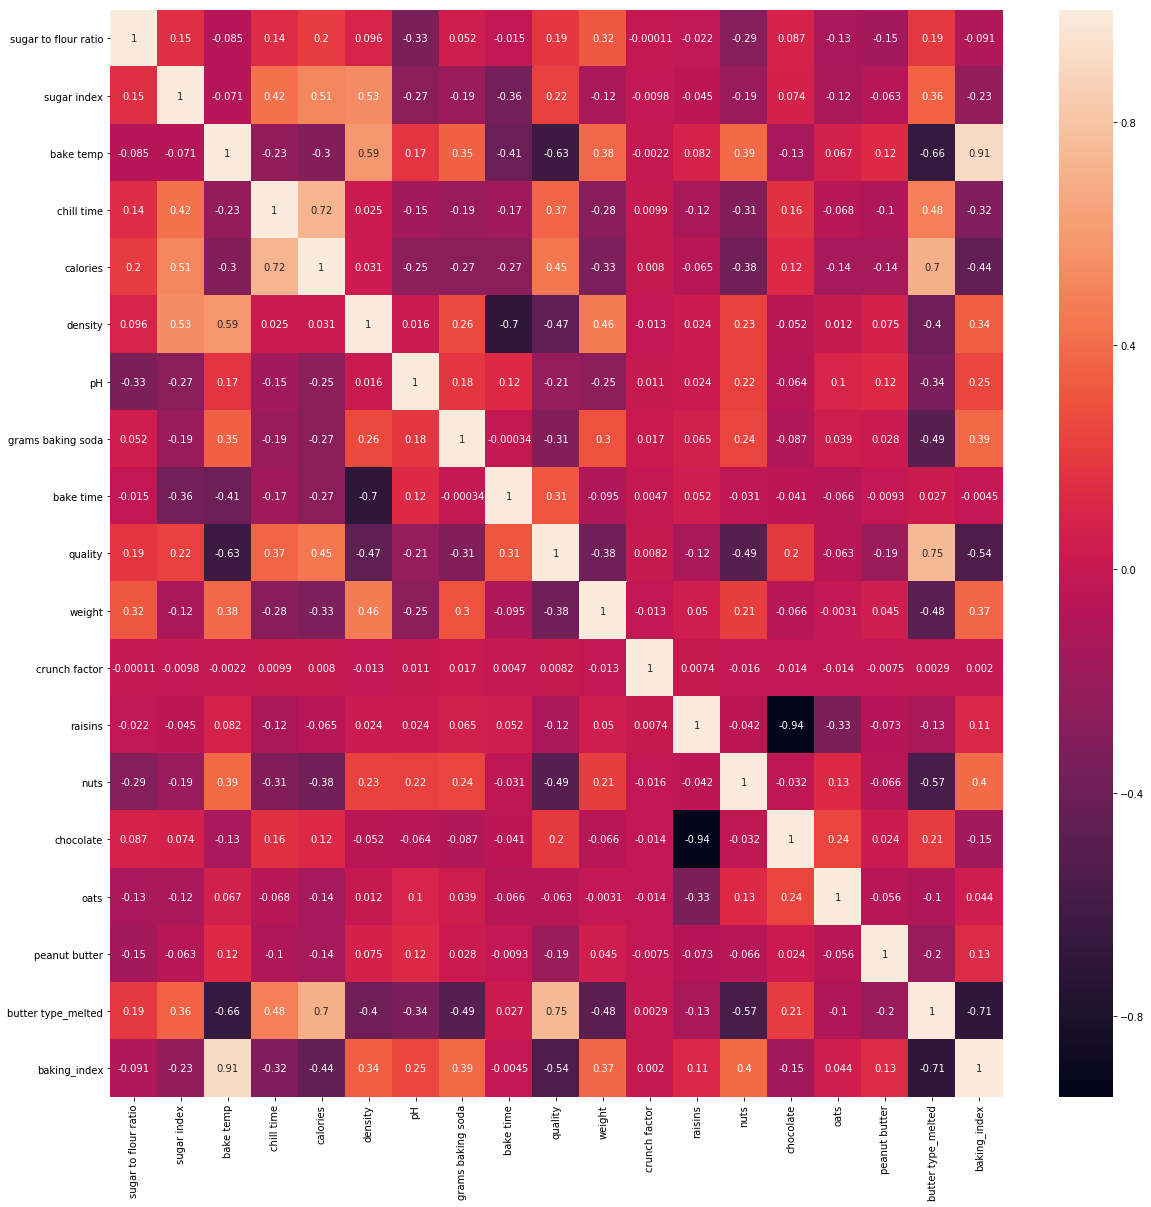

In [249]:
plt.figure(figsize = (20,20))
sns.heatmap(df_clean.corr(), annot = True)

We are going to scalate the data

In [250]:
from sklearn.preprocessing import scale

In [251]:
X = df_clean.drop(columns = ['bake temp', 'bake time', 'raisins', 'quality'])

In [252]:
y = df_clean['quality']

In [253]:
X = scale(X)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


# With the data cleaned we can start to think about the ML

**We have to be careful with the correlation of chocolate and raisins**

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error

In [255]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [256]:
model = LinearRegression()

In [257]:
scores = cross_val_score(model, X, y, cv=5)
print ("Cross-validated scores:", scores)

Cross-validated scores: [0.69554909 0.67892726 0.6231023  0.66328251 0.67725013]


In [258]:
predictions = cross_val_predict(model, X, y, cv=5)

In [259]:
predictions

array([8.11725765, 7.17014642, 8.72806752, ..., 7.98364937, 8.23195817,
       6.29938538])

In [260]:
y_true = [int(i) for i in predictions]

In [261]:
mean_squared_error(y, y_true)

0.8549854791868344